# Sticker Sale Prediction

## Data Loading

In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

## Exploratory Data Analysis

In [3]:
df_train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
df_test.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [5]:
print(f'Train shape: {df_train.shape}')
print(f'Test shape: {df_test.shape}')

Train shape: (230130, 6)
Test shape: (98550, 5)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [7]:
df_train.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [8]:
df_train.isnull().sum()

,0
id,0
date,0
country,0
store,0
product,0
num_sold,8871


In [9]:
df_test.isnull().sum()

,0
id,0
date,0
country,0
store,0
product,0


In [10]:
df_train.duplicated().sum()

0

In [11]:
df_test.duplicated().sum()

0

In [12]:
df_train.dropna(subset=['num_sold'],inplace=True)
df_train.drop('id',axis=1,inplace=True)

X_test=df_train.copy()

In [13]:
# Extracting date feature

def extract_date_features(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name], errors='coerce')

    df['Year'] = df[column_name].dt.year
    df['Month'] = df[column_name].dt.month_name()
    df['Day'] = df[column_name].dt.day_name()
    df['Weekday'] = df[column_name].dt.weekday
    df['Week'] = df[column_name].dt.isocalendar().week
    df['Month_Start'] = df[column_name].dt.is_month_start
    df['Month_End'] = df[column_name].dt.is_month_end
    df['Leap_Year'] = df[column_name].dt.is_leap_year

    df.drop(column_name, inplace=True, axis = 1)
    return df.head()

extract_date_features(df_train,column_name='date')
extract_date_features(X_test,column_name='date')

,country,store,product,num_sold,Year,Month,Day,Weekday,Week,Month_Start,Month_End,Leap_Year
1,Canada,Discount Stickers,Kaggle,973.0,2010,January,Friday,4,53,True,False,False
2,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,January,Friday,4,53,True,False,False
3,Canada,Discount Stickers,Kerneler,423.0,2010,January,Friday,4,53,True,False,False
4,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,January,Friday,4,53,True,False,False
5,Canada,Stickers for Less,Holographic Goose,300.0,2010,January,Friday,4,53,True,False,False


## Data Visualization

In [14]:
# Duplicating Dataframe for data visualization

df_dv = df_train.copy()

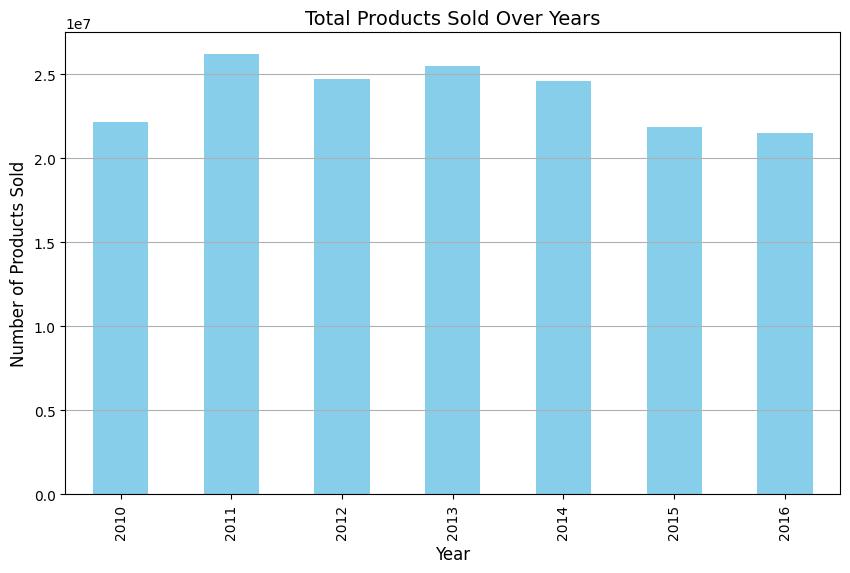

In [15]:
# Sales Distribution Over Years

plt.figure(figsize=(10, 6))
sales_by_year = df_dv.groupby('Year')['num_sold'].sum()
sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Products Sold Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Products Sold', fontsize=12)
plt.grid(axis='y')
plt.show()

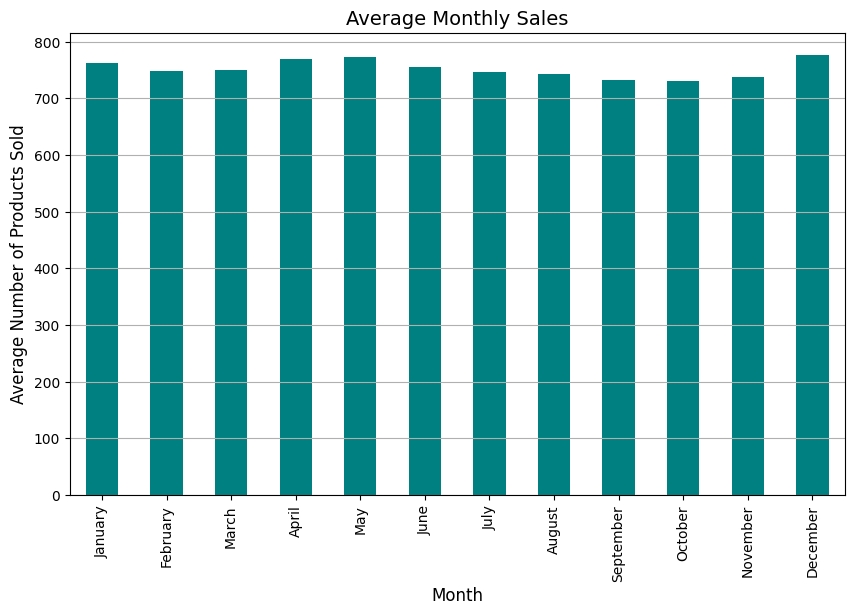

In [16]:
# Monthly sales trends

plt.figure(figsize=(10, 6))
sales_by_month = df_dv.groupby('Month')['num_sold'].mean()
sales_by_month = sales_by_month.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

sales_by_month.plot(kind='bar', color='teal')
plt.title('Average Monthly Sales', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Number of Products Sold', fontsize=12)
plt.grid(axis='y')
plt.show()


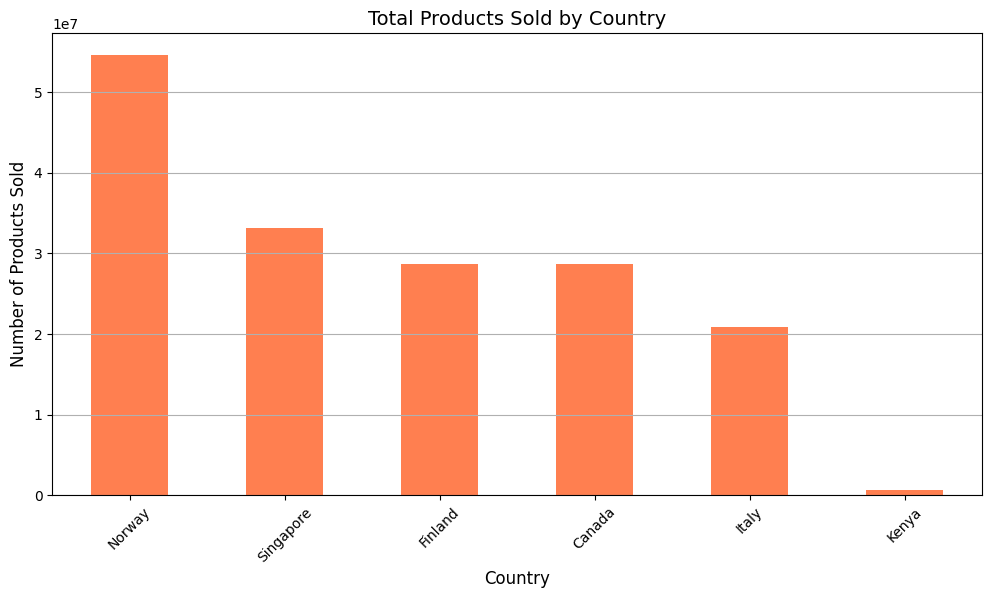

In [17]:
# Sales by Country

plt.figure(figsize=(12, 6))
sales_by_country = df_dv.groupby('country')['num_sold'].sum().sort_values(ascending=False)
sales_by_country.plot(kind='bar', color='coral')
plt.title('Total Products Sold by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Products Sold', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

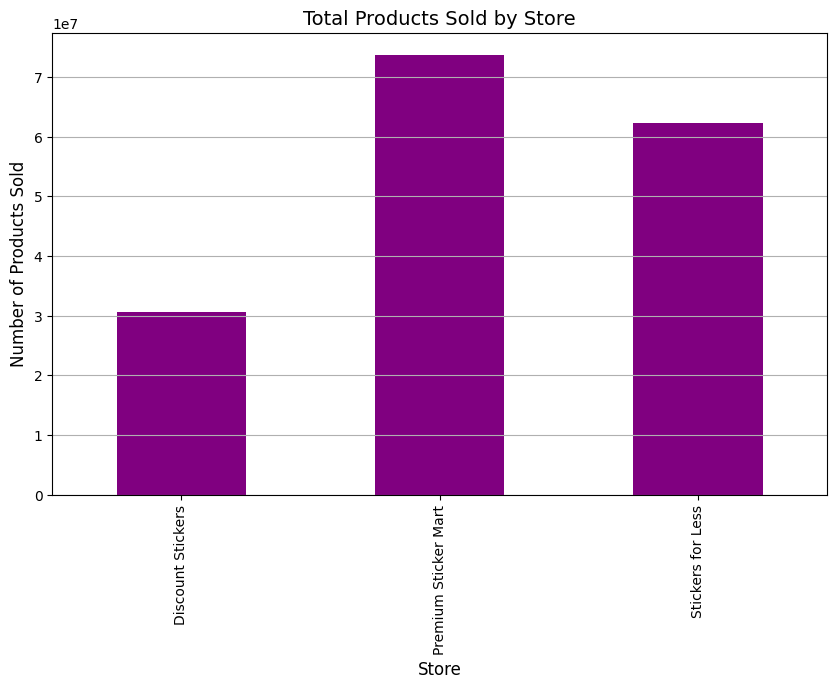

In [18]:
# Store-Wise Sales Analysis

plt.figure(figsize=(10, 6))
sales_by_store = df_dv.groupby('store')['num_sold'].sum()
sales_by_store.plot(kind='bar', color='purple')
plt.title('Total Products Sold by Store', fontsize=14)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Number of Products Sold', fontsize=12)
plt.grid(axis='y')
plt.show()

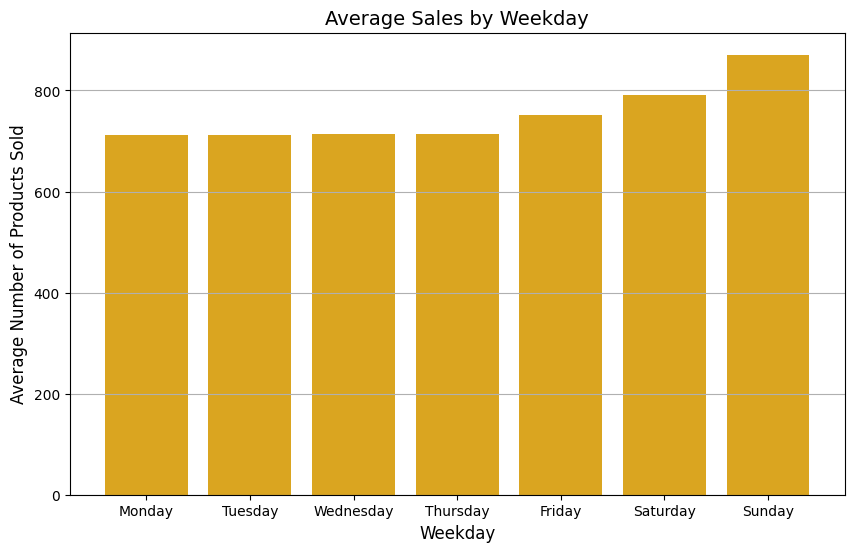

In [19]:
# Weekday sales pattern

plt.figure(figsize=(10, 6))
weekday_sales = df_dv.groupby('Weekday')['num_sold'].mean()
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(weekday_labels, weekday_sales, color='goldenrod')
plt.title('Average Sales by Weekday', fontsize=14)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Average Number of Products Sold', fontsize=12)
plt.grid(axis='y')
plt.show()

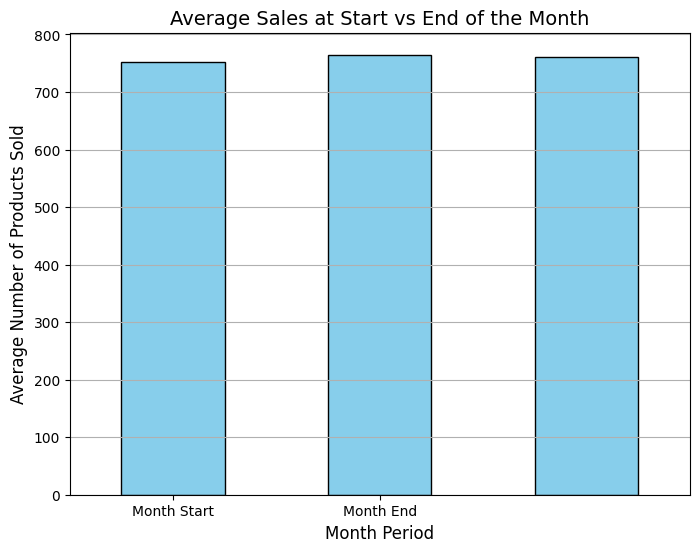

In [20]:
# Monthly Start vs. End Sales

plt.figure(figsize=(8, 6))
month_start_end = df_dv.groupby(['Month_Start', 'Month_End'])['num_sold'].mean()

month_start_end.plot(kind='bar', color=['skyblue'], edgecolor='black')
plt.title('Average Sales at Start vs End of the Month', fontsize=14)
plt.xticks([0, 1], ['Month Start', 'Month End'], rotation=0)
plt.xlabel('Month Period', fontsize=12)
plt.ylabel('Average Number of Products Sold', fontsize=12)
plt.grid(axis='y')
plt.show()

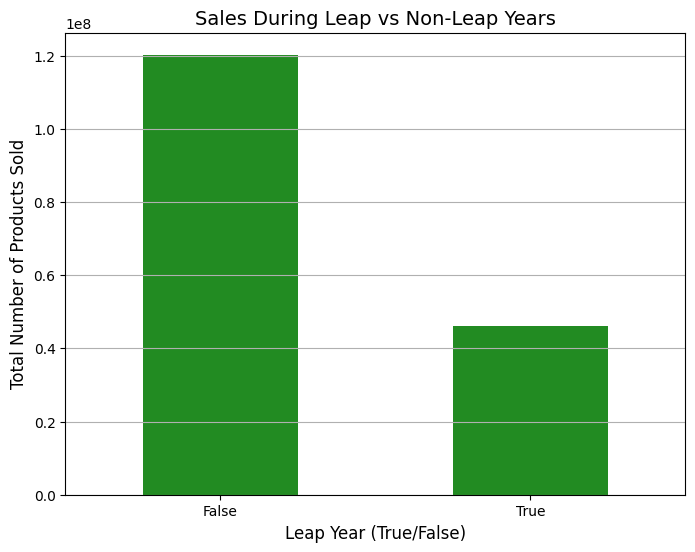

In [21]:
# Leap Year Sales Analysis

plt.figure(figsize=(8, 6))
sales_by_leap_year = df_dv.groupby('Leap_Year')['num_sold'].sum()
sales_by_leap_year.plot(kind='bar', color='forestgreen')
plt.title('Sales During Leap vs Non-Leap Years', fontsize=14)
plt.xlabel('Leap Year (True/False)', fontsize=12)
plt.ylabel('Total Number of Products Sold', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

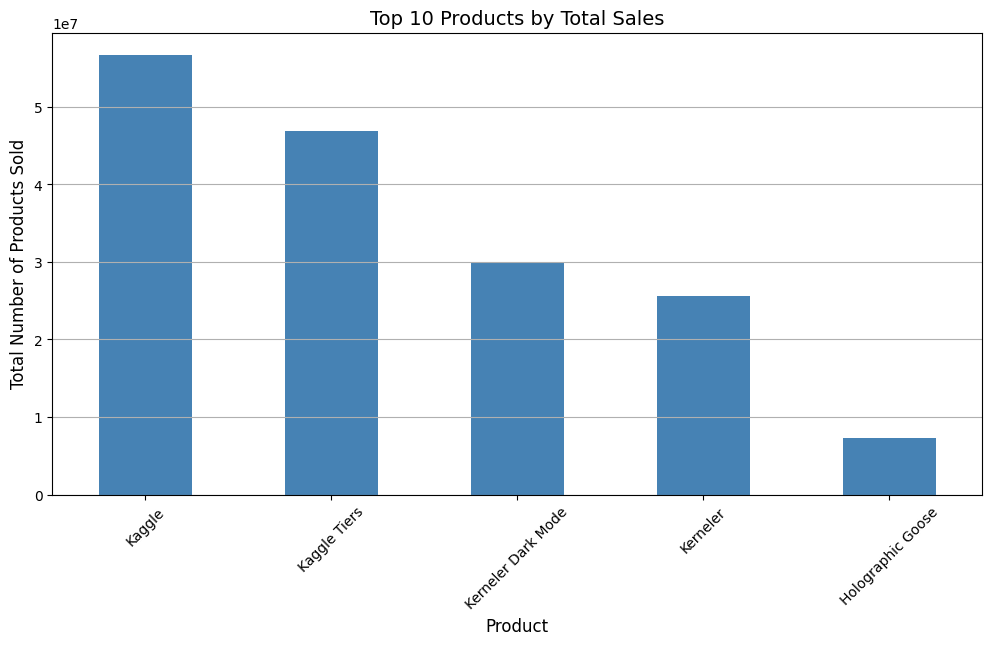

In [22]:
# Top Products by sales

plt.figure(figsize=(12, 6))
top_products = df_dv.groupby('product')['num_sold'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='steelblue')
plt.title('Top 10 Products by Total Sales', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Number of Products Sold', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

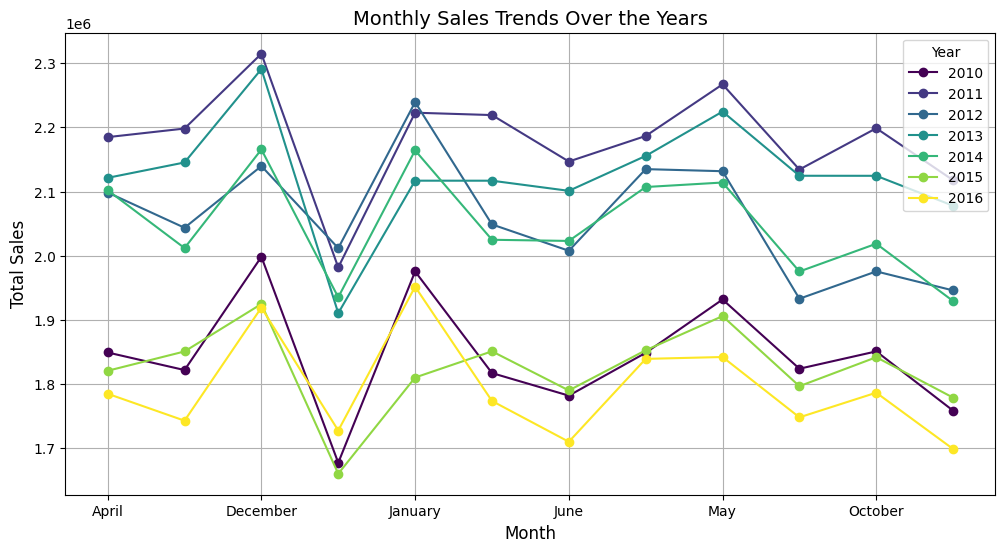

In [23]:
# Monthly Sales Trends Over the Years

plt.figure(figsize=(12, 6))
monthly_sales_trend = df_dv.groupby(['Year', 'Month'])['num_sold'].sum().unstack(level=0)
monthly_sales_trend.plot(marker='o', figsize=(12, 6), colormap='viridis')
plt.title('Monthly Sales Trends Over the Years', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Year')
plt.grid(True)
plt.show()

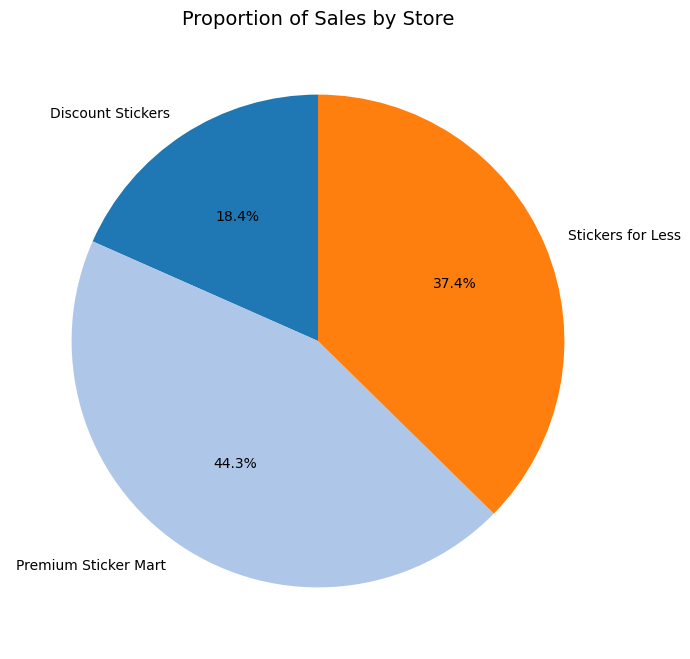

In [24]:
# Proportion of Sales by Store

plt.figure(figsize=(8, 8))
sales_by_store = df_dv.groupby('store')['num_sold'].sum()
sales_by_store.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Proportion of Sales by Store', fontsize=14)
plt.ylabel('')
plt.show()

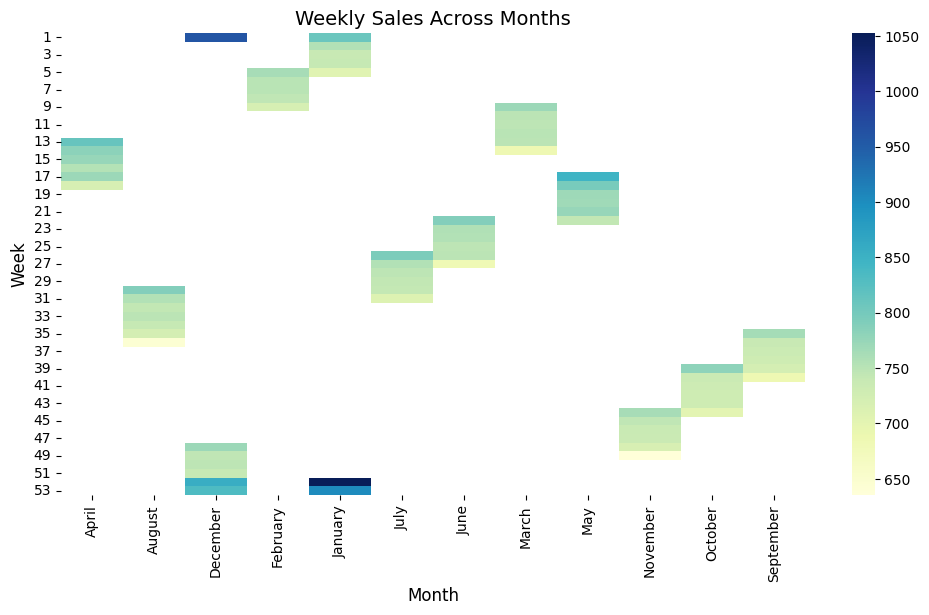

In [25]:
# Weekly Sales Across Months

weekly_sales = df_dv.pivot_table(index='Week', columns='Month', values='num_sold', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(weekly_sales, cmap='YlGnBu', annot=False, cbar=True)
plt.title('Weekly Sales Across Months', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Week', fontsize=12)
plt.show()

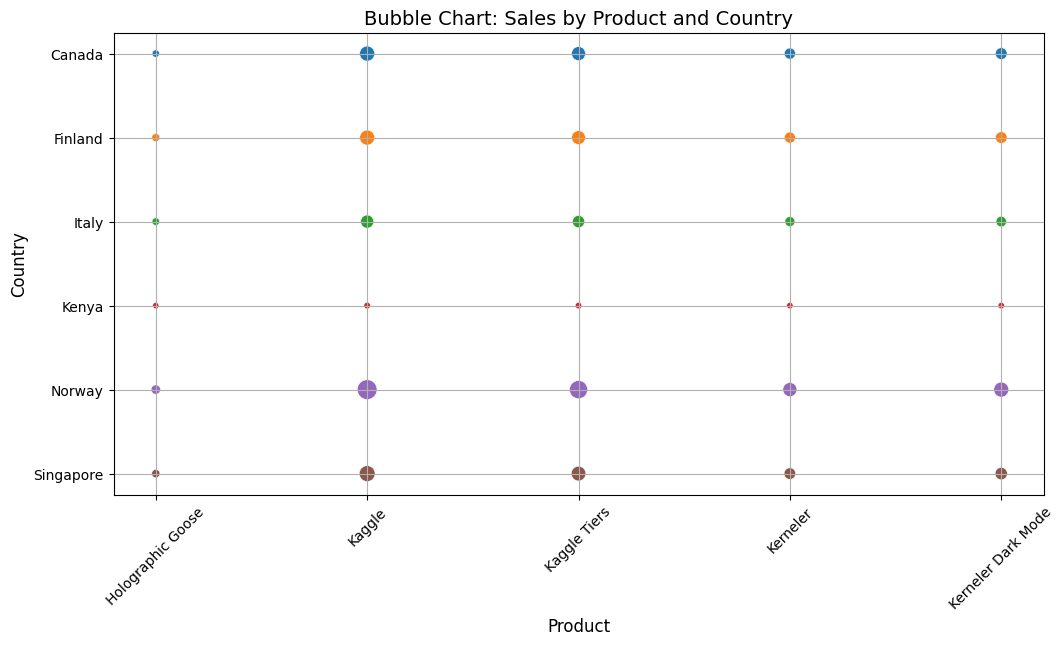

In [26]:
# Sales by Product and Country

plt.figure(figsize=(12, 6))
product_sales = df_dv.groupby(['product', 'country'])['num_sold'].sum().reset_index()
sns.scatterplot(
    data=product_sales, x='product', y='country', size='num_sold', sizes=(20, 200), hue='country', legend=False
)
plt.title('Bubble Chart: Sales by Product and Country', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Data Preprocessing

In [27]:
# One Hot Encoding

def dummies(df,cols):
    for col in cols:
        dummies = pd.get_dummies(df[col],dtype=int,prefix=col)
        df = pd.concat([df,dummies],axis=1)
        df = df.drop(labels=col, axis=1)
    return df

nominal = ['country', 'store', 'product']
df_train = dummies(df_train,nominal)
X_test = dummies(X_test,nominal)

In [28]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

df_train['Month_Start']=df_train['Month_Start'].replace({True:1,False:0})
df_train['Month_End']=df_train['Month_End'].replace({True:1,False:0})
df_train['Leap_Year']=df_train['Leap_Year'].replace({True:1,False:0})
X_test['Month_Start']=X_test['Month_Start'].replace({True:1,False:0})
X_test['Month_End']=X_test['Month_End'].replace({True:1,False:0})
X_test['Leap_Year']=X_test['Leap_Year'].replace({True:1,False:0})

df_train["Month"] = enc.fit_transform(df_train["Month"])
df_train["Month"]=df_train["Month"]+1
df_train["Day"] = enc.fit_transform(df_train["Day"])
df_train["Day"] = df_train["Day"]+1
X_test["Month"] = enc.fit_transform(X_test["Month"])
X_test["Month"]=X_test["Month"]+1
X_test["Day"] = enc.fit_transform(X_test["Day"])
X_test["Day"] = X_test["Day"]+1

In [29]:
X = df_train.drop(columns='num_sold')
y = df_train['num_sold']

In [30]:
# Train test and split

from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=40)

## Model Building

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [32]:
xgb = XGBRegressor()

In [33]:
model = xgb.fit(X_train,y_train)

In [34]:
y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X_train)

## Model Prediction

In [35]:
# R2 Score

print(f'Train R2 Score: {r2_score(y_train,y_pred_train)}')
print(f'Validation R2 Score: {r2_score(y_val,y_pred_val)}')

Train R2 Score: 0.992690374685267
Validation R2 Score: 0.9921760043337519


In [36]:
# MSE

print(f'Train MSE: {mean_squared_error(y_train,y_pred_train)}')
print(f'Validation MSE: {mean_squared_error(y_val,y_pred_val)}')

Train MSE: 3481.0877873027334
Validation MSE: 3729.677620850956
